# A Climber Explores an iCloud User Agreement

## Abstract Aims:
    - Narrative/readability/commenting: Can I collapse these into a simple act?
        - Markdown cell precedes code and code contains no commenting
    - Get it done, let go of perfecting a vision
    - Document organization is designed for an outside reader
    - At the end, I'm proud of the product and am not lost when explaining it to lay-folk

### Peaks: 
     - Identify what *should* be read.
     - Build a framework for comparing user agreements.
### Lines: 
     - character counts
     - punctuation
     - word counts
     - word types (noun, verb & boolean)
     - word combinations
     - proper nouns
     -
### Gear List: 
    - document parsing (new lines, section headers, ...)
    - dictionaries (different for each Line?)
    - RegEx patterns 
    - color palettes
    -   
### Movement/Techniques:
    - bars (line length, )
    - stacked bars (word type stack per section, )
    - scatter (characters, section, word length
    - 
### Maintenance:
    - commenting: describe the operation and justification
    - testing operation accuracy (Each comment should 
    - what to do with hyperlinks
    

# Unknowns and Curiosities:
    - The NON-caps-locked roman numeral sections, in title, contain the user's vulnerabilities
    - I use cells to develop in steps. As a consequence, a given cell is not a final product.
    - Am I keeping comments and code in sync?

In [9]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rgb(r, g, b):
    return [r/255, g/255, b/255]

with open("//Users//zachpolitz//Desktop//RE_docs//apple_user_agreement_a.txt", 'r', encoding='utf-8') as f:
    user_agmt = list(f)


In [10]:
# The document at a glance:

print("Rows in the file: ", len(user_agmt), '\n'*2)

for row in user_agmt[:6]:
    print(repr(row))                                   # repr() prints the raw string

Rows in the file:  318 


'Welcome to iCloud\n'
' \n'
'THIS LEGAL AGREEMENT BETWEEN YOU AND APPLE GOVERNS YOUR USE OF THE iCLOUD PRODUCT, SOFTWARE, SERVICES, AND WEBSITES (COLLECTIVELY REFERRED TO AS THE “SERVICE”). IT IS IMPORTANT THAT YOU READ AND UNDERSTAND THE FOLLOWING TERMS. BY CLICKING “AGREE,” YOU ARE AGREEING THAT THESE TERMS WILL APPLY IF YOU CHOOSE TO ACCESS OR USE THE SERVICE.\n'
' \n'
"Apple is the provider of the Service, which permits you to utilize certain Internet services, including storing your personal content (such as contacts, calendars, photos, notes, reminders, documents, app data, and iCloud email) and making it accessible on your compatible devices and computers, and certain location based services, only under the terms and conditions set forth in this Agreement. iCloud is automatically enabled when you are running devices on iOS 9 or later and sign in with your Apple ID during device setup, unless you are upgrading the device and have previously chosen not to

In [3]:
# Here, we find that the file was read in with a return following every row of content.
j = 0
for row in user_agmt:
    print("Row: " + str(j), "Characters: ", len(row))
    if len(row) < 4:
        print("text: ",'\n',"'", row, "'")

    j+=1


Row: 0 Characters:  18
Row: 1 Characters:  2
text:  
 '  
 '
Row: 2 Characters:  337
Row: 3 Characters:  2
text:  
 '  
 '
Row: 4 Characters:  894
Row: 5 Characters:  2
text:  
 '  
 '
Row: 6 Characters:  39
Row: 7 Characters:  2
text:  
 '  
 '
Row: 8 Characters:  762
Row: 9 Characters:  2
text:  
 '  
 '
Row: 10 Characters:  316
Row: 11 Characters:  2
text:  
 '  
 '
Row: 12 Characters:  555
Row: 13 Characters:  2
text:  
 '  
 '
Row: 14 Characters:  1049
Row: 15 Characters:  2
text:  
 '  
 '
Row: 16 Characters:  490
Row: 17 Characters:  2
text:  
 '  
 '
Row: 18 Characters:  443
Row: 19 Characters:  2
text:  
 '  
 '
Row: 20 Characters:  1612
Row: 21 Characters:  2
text:  
 '  
 '
Row: 22 Characters:  26
Row: 23 Characters:  2
text:  
 '  
 '
Row: 24 Characters:  20
Row: 25 Characters:  2
text:  
 '  
 '
Row: 26 Characters:  485
Row: 27 Characters:  2
text:  
 '  
 '
Row: 28 Characters:  789
Row: 29 Characters:  2
text:  
 '  
 '
Row: 30 Characters:  972
Row: 31 Characters:  2
text

<BarContainer object of 318 artists>

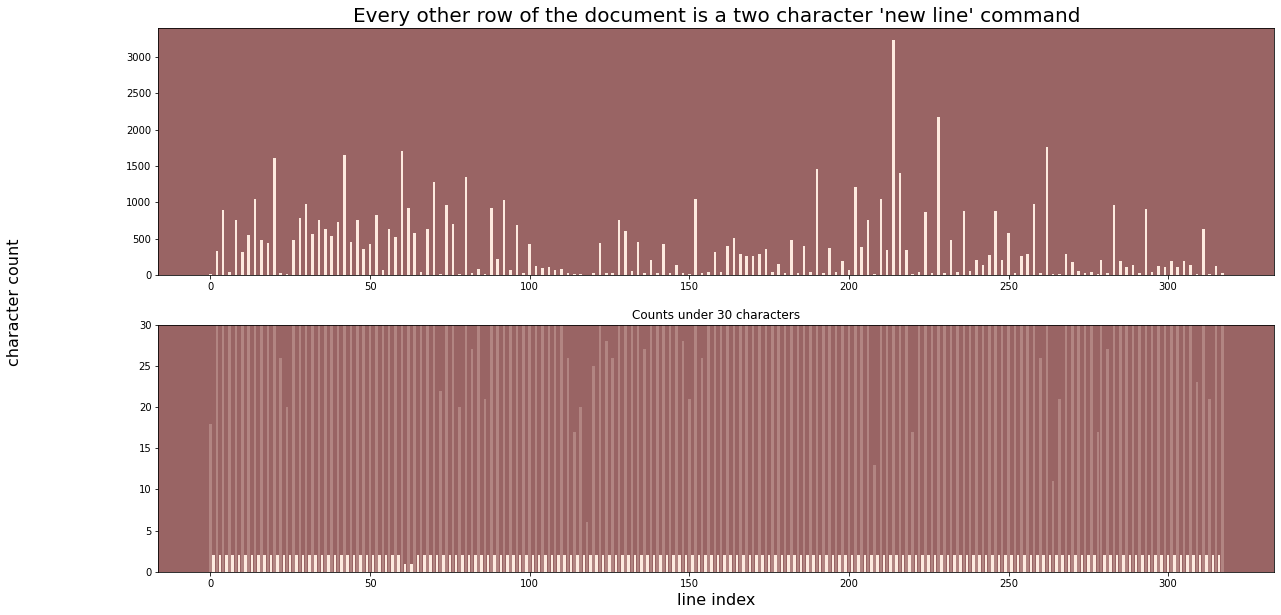

In [4]:
# Using a graph, show the frequency of new lines:

line_number = []
long_line_length = []
short_line_length = []

for index in range (0,len(user_agmt)):
    if len(user_agmt[index]) < 5:                        # If the line is less than four characters,
        short_line_length.append(len(user_agmt[index]))  # append the line length to the short_line vector
        long_line_length.append(0)                       # append a value of 0 do the long_line vector
    else:                                                # otherwise, 
        long_line_length.append(len(user_agmt[index]))   # append the line length to the long_line vector
        short_line_length.append(0)                      # and append a value of 0 to the short_line vector.
    line_number.append(index)                            # Both vectors will be plotted against their index.
    

fig, ax = plt.subplots(2)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.supylabel("character count", size = 16)

ax[0].set_title("Every other row of the document is a two character 'new line' command",size = 20)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_facecolor(rgb(153,100,100))
ax[0].bar(line_number, long_line_length, color = rgb(253,234,223))
ax[0].bar(line_number, short_line_length, color = rgb(253,234,223))


ax[1].set_title("Counts under 30 characters")
ax[1].set_ylabel('')
ax[1].set_xlabel('line index',size = 16)
ax[1].set_ylim(0,30)
ax[1].set_facecolor(rgb(153,100,100))
ax[1].bar(line_number, long_line_length, color = rgb(253,234,223), alpha = .25)
ax[1].bar(line_number, short_line_length, color = rgb(253,234,223))


### Cleaning
Complete:
- blank, '\n' rows of the raw document

To-Do:
- separate text into a section dictionary

In [12]:
# Remove new line items from user_agmt, or if user_agmt[index] == ' \n'

for row in range (0, (len(user_agmt)-1)):
    if (user_agmt[row] == ' \n') or (user_agmt[row] == '\n'):     # rewrite with re
        del(user_agmt[row])


# Confirm that there are no new lines in the document
        
j = 0                                                    # track the row number
for row in user_agmt:                                    # Print each row's index and character length
    print("Row: " + str(j), "Characters: ", len(row))
    if len(row) < 4:                                     # If the row is < 4 characters long
        print("text: ",'\n', row)               # print the row's text with the 'j' term as row number.
    j+=1                                                 # iterate the row number

Row: 0 Characters:  18
Row: 1 Characters:  337
Row: 2 Characters:  894
Row: 3 Characters:  39
Row: 4 Characters:  762
Row: 5 Characters:  316
Row: 6 Characters:  555
Row: 7 Characters:  1049
Row: 8 Characters:  490
Row: 9 Characters:  443
Row: 10 Characters:  1612
Row: 11 Characters:  26
Row: 12 Characters:  20
Row: 13 Characters:  485
Row: 14 Characters:  789
Row: 15 Characters:  972
Row: 16 Characters:  562
Row: 17 Characters:  761
Row: 18 Characters:  641
Row: 19 Characters:  533
Row: 20 Characters:  734
Row: 21 Characters:  1647
Row: 22 Characters:  450
Row: 23 Characters:  760
Row: 24 Characters:  357
Row: 25 Characters:  424
Row: 26 Characters:  822
Row: 27 Characters:  71
Row: 28 Characters:  635
Row: 29 Characters:  530
Row: 30 Characters:  1710
Row: 31 Characters:  925
Row: 32 Characters:  582
Row: 33 Characters:  44
Row: 34 Characters:  632
Row: 35 Characters:  1279
Row: 36 Characters:  22
Row: 37 Characters:  959
Row: 38 Characters:  705
Row: 39 Characters:  20
Row: 40 Chara

## Dictionaries: 
 - words (inner-word punctuation gets removed)
 - characters
 - word groupings

In [153]:
# Generate a dicitonary of words that are present in the user agreement.


word_dict = {}
n_words = 0

for line in user_agmt:               # split sentence(line) into list of words
    raw_words = repr(line).strip()
    words = raw_words.split()

    for word in words:
        one_sub = re.sub(r'\\n','',word)
        subbed_word = re.sub(r'\W+', '', one_sub)       # strip non-alphanumeric characters from the string
                                                        # This also removes interior word punctutation
        if word in word_dict:
            word_dict[subbed_word] += 1
        if word not in word_dict:                       
            word_dict[subbed_word] = 1
        
        n_words += 1
        #print(word, " "*(15-len(word)) ,subbed_word)    # Debugging logs
        

#print('Number of words in the user agreement: ', n_words)
#print('Number of distinct "words" in the user agreement: ' ,len(word_dict))

In [154]:
# Sort word_dict and list each word with it's corresponding count

word_list = []

for row in word_dict:
    word_list.append((word_dict[row],row))

word_list = sorted(word_list, reverse = True)
word_list

[(246, 'of'),
 (231, 'your'),
 (157, 'or'),
 (108, 'the'),
 (98, 'any'),
 (95, 'in'),
 (88, 'be'),
 (82, 'for'),
 (61, 'by'),
 (60, 'on'),
 (58, 'will'),
 (54, 'THE'),
 (52, 'such'),
 (48, 'OR'),
 (47, 'other'),
 (45, 'this'),
 (45, 'are'),
 (42, 'agree'),
 (41, 'have'),
 (39, 'to'),
 (39, 'may'),
 (39, 'at'),
 (37, 'AND'),
 (33, 'shall'),
 (33, 'all'),
 (31, 'with'),
 (30, 'as'),
 (28, 'can'),
 (27, 'not'),
 (27, 'an'),
 (22, 'provide'),
 (20, 'its'),
 (20, 'if'),
 (19, 'otherwise'),
 (18, 'use'),
 (17, 'information'),
 (17, 'Shared'),
 (16, 'you'),
 (16, 'without'),
 (16, 'using'),
 (16, 'part'),
 (16, 'certain'),
 (16, 'NOT'),
 (15, 'third'),
 (15, 'no'),
 (15, 'has'),
 (15, 'FOR'),
 (15, 'Beta'),
 (14, 'which'),
 (14, 'make'),
 (14, 'location'),
 (13, 'under'),
 (13, 'responsible'),
 (13, 'do'),
 (13, 'YOUR'),
 (12, 'reasonable'),
 (12, 'only'),
 (12, 'limited'),
 (12, 'THAT'),
 (11, 'violation'),
 (11, 'via'),
 (11, 'used'),
 (11, 'reserves'),
 (11, 'required'),
 (11, 'recovery'),

In [116]:
# Generate a dictionary for each character used.

char_dict = {}

for line in user_agmt:
    words = line.split()
    
    for word in words:
        lower_word = word.lower()    

        for letter in lower_word:
            if letter not in char_dict:
                char_dict[letter] = 1
            else:
                char_dict[letter] += 1
                
# Sort char_dict and list each character with it's corresponding count

char_list = []

for row in char_dict:
    char_list.append( (char_dict[row],row) )

char_list = sorted(char_list, reverse = True)
                

## Parse Document 
- Roman Numeraled Sections: compare header to roman numeral list and .pop() the item from the list when found.
    - Complete: dictionary named 'sections'
- Lettered Subsections:
    - 1st Draft: sections[roman numeral title] = {lettered header: text}
- Numbered Subsections:
- Paragraphs:
- Sentences:


### Thoughts:
    - It doesn't feel like a clean write to the dictionary
    - It doesn't feel like a clean access to data.
    - Am I doing unnecessary work?
    - I'm not here to analyze content, only structure.
    - Separate non-content headers, but detect sections and subsections.
    - Would it be enought to simply look at each roman numeral section?
    - 

In [136]:
# Describe what's about to happen


roman_numerals = ['I.','II.','III.','IV.','V.','VI.','VII.','VIII.','IX.','X.']
sections = {}              # NOT COMPLETE: sections[roman numeral][A-Z][1-9][a-z]
rn_sections = {}           # Dictionary with roman numeral keys and the resepctive text. 
full_text = ''             # String of document text stripped of section headers


sect = None                                     # Stores the roman numeral section in use
for row in user_agmt:                           # loop through each raw parcel of the user_agreement
    if len(row) < 60:                                 # If the section's short;  is this a section header?
        for rn in range (0, len(roman_numerals)):     # for each roman numeral,
            if roman_numerals[rn] in row:             # if it's in the above section
                roman_numerals.pop(rn)                  # remove that roman numeral from the list
                sect = row                              # set sect equal to the short section    
                sections[sect] = []                     # create an empty list value with sect as the key
                #print(sect)
                break

    if sect != None:                                     # Once we've found any roman numeral header
        if sect != row:                               

            if re.match(r'^ {10}[A-Z]\.', row):           # check for A-Z header
                upper_letter = row[:12].strip()                           
                text = row[13:]
                #print("A-Z")
                
            elif re.match(r'^ +[1-9]\.', row):           # check for numbered header
                number = row[:15].strip()
                text = row[15:]
                #print('1-9')          
                    
            elif re.match(r'[a-z]\.', row):             # check for a-z header
                lower_letter = row[:2].strip()
                text = row[3:]
                #print('a-z')
            
            else:
                text = row
            
            if sect in rn_sections:
                rn_sections[sect] = rn_sections[sect]+text
            else: 
                rn_sections[sect] = ''
            
            sections[sect].append(text)   
            full_text = full_text + text

# Test
for row in rn_sections:
    print(row) 

I. REQUIREMENTS FOR USE OF THE SERVICE

II. FEATURES AND SERVICES

III. SUBSCRIPTION UPGRADES

IV. Your Use of the Service

V. Content and Your Conduct

VI. Software

VII. Termination

VIII. Links and Other Third Party Materials

IX. DISCLAIMER OF WARRANTIES; LIMITATION OF LIABILITY

X. GENERAL



## Graphs:
- character count
- word density per section

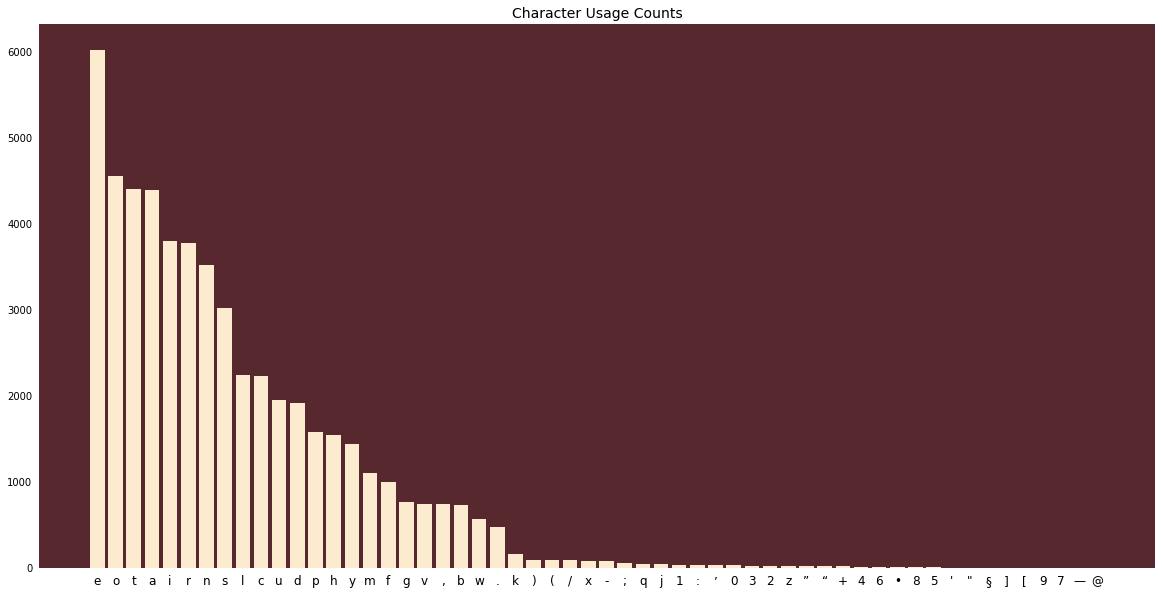

In [137]:
### Count of each character in the document
x=[]
y=[]

for i in range (0,len(char_list)):
    point = char_list[i]
    x.append(point[1])
    y.append(point[0])
        

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(10)

ax.set_title("Character Usage Counts",fontsize = 14)
ax.set_ylabel("")
ax.tick_params(axis = 'x',labelsize = 12, bottom=False)
ax.tick_params(axis = 'y', left=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.bar(x,y,color = [.992,.922,.816])
ax.set_facecolor([.341,.160,.18])

plt.show()

Distribution of word lengths:
- x = section roman numeral
- y = scatter of each word's length

II. FEATURES AND SERVICES

II. FEATURES AND SERVICES

II. FEATURES AND SERVICES

II. FEATURES AND SERVICES

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software

VI. Software



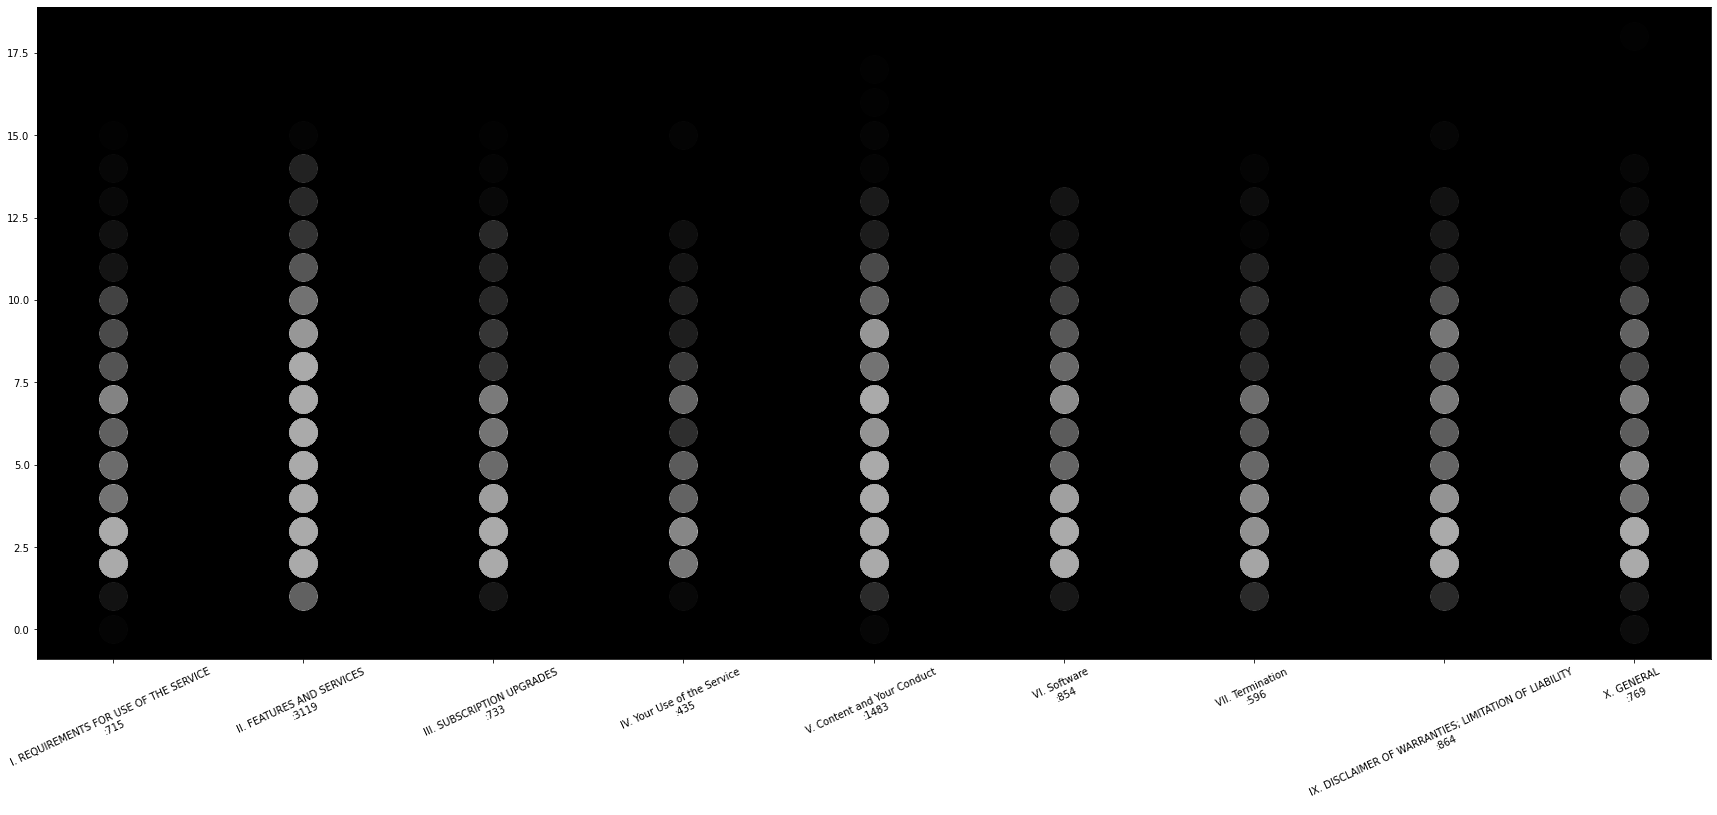

In [236]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(12)

ax.tick_params(axis = 'x',rotation = 25)
# ax.set_ylim(0,20)
ax.tick_params(axis = 'y',)
# ax.set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax.set_facecolor('black')

n_hyperlinks = 0
for rn in rn_sections:
    d_x = []
    d_y = []
    section_length = str(len(rn_sections[rn].split()))
    
    for word in rn_sections[rn].split():        
        if 'beta' in word.lower():
            print(rn)
        if re.match(r'https?://',word) or re.match(r'Apple.co',word) or re.match(r'abuse@',word):  
            n_hyperlinks +=1
        else:
            clean_word = re.sub(r'\W+','',word)
            d_x.append(rn + ':' + section_length)
            if len(word) > 20:
                print('long word: ', word)
            d_y.append(len(clean_word))

    ax.scatter(d_x,d_y,color = 'white',s = 800, alpha = .01)
    size = 0


In [291]:
# Extract sentences written in caps.

for line in user_agmt:
    sentences = line.split('. ')
    for sentence in sentences:

        t = re.match(r'[A-Z][A-Z]', sentence) # match any sentence with multiple capital letters in a row

        if t:
            print(sentence)
            print('\n')

THIS LEGAL AGREEMENT BETWEEN YOU AND APPLE GOVERNS YOUR USE OF THE iCLOUD PRODUCT, SOFTWARE, SERVICES, AND WEBSITES (COLLECTIVELY REFERRED TO AS THE “SERVICE”)


IT IS IMPORTANT THAT YOU READ AND UNDERSTAND THE FOLLOWING TERMS


BY CLICKING “AGREE,” YOU ARE AGREEING THAT THESE TERMS WILL APPLY IF YOU CHOOSE TO ACCESS OR USE THE SERVICE.



REQUIREMENTS FOR USE OF THE SERVICE



II


FEATURES AND SERVICES



LOCATION-BASED SERVICES ARE NOT INTENDED OR SUITABLE FOR USE AS AN EMERGENCY LOCATOR SYSTEM.



III


SUBSCRIPTION UPGRADES



YOU ARE RESPONSIBLE FOR THE TIMELY PAYMENT OF ALL FEES AND FOR PROVIDING APPLE WITH VALID CREDIT CARD OR PAYMENT ACCOUNT DETAILS FOR PAYMENT OF ALL FEES


IV


VI


THE USE OF THE SOFTWARE OR ANY PART OF THE SERVICE, EXCEPT FOR USE OF THE SERVICE AS PERMITTED IN THIS AGREEMENT, IS STRICTLY PROHIBITED AND INFRINGES ON THE INTELLECTUAL PROPERTY RIGHTS OF OTHERS AND MAY SUBJECT YOU TO CIVIL AND CRIMINAL PENALTIES, INCLUDING POSSIBLE MONETARY DAMAGES, FOR COPYRI

### SCRATCH PAPER

- Notions of a "clean" document:
    - Can extract counts for characters, words, sentences, sections.
    - I understand how open() parsed the document and have compensated accordingly
    - Extract section and subsection headers
    - Can test for each of these desireable conditions
    - Document format is mapped/understood and poses no issues
- Word pair/triplet/quartet frequencies
    - eg: [\w* \w* \w*]
- Sentence complexity 
    - sentence length
    - word length distribution
    - logical operators
    - nouns and verbs
- A sense of which sections hold potency
    - 
- Curiosities:
    - '  ' Two spaces after some sentences.
- Caps locked sentences are commonplace indicators of making important contract language more conspicuous.
- Ideas:
    - section/subsection breakdowns (stacked graphs
